# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 9381 Шахин Никита и Аухадиев Александр. Вариант №7

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

**Дискретный сигнал:** $x_0, x_1, x_2, ..., x_{N-1}$, как правило, получается при дискретизации аналогового (определенного во все моменты времени) сигнала $s(t)$ 

Будем считать, что отсчеты $x_k, k = 0,1,2,3, ..., N-1$ дискретного
сигнала получены в результате равномерной
дискретизации сигнала $s(t)$  с шагом дискретизации,
равным единице: $x_k = s(t_k), k = 0,1,2,3, ..., N-1; t_k - t_{k-1} = T, k = 1,2,3, ..., N-1; T = 1$

Если на самом деле $t_k - t_{k-1} = \Delta t, k = 1,2,3, ..., N-1; \Delta t \ne 1 $
то вводим в рассмотрение $\hat{t_k} = \dfrac{(t_k - t_0)}{\Delta t}, k = 0,1,2,3, ..., N-1$

В результате получим: $\hat{t_k} = k; s(\hat{t_k}) = s(k \Delta t), k = 0,1, ..., N-1$

**Дискретное преобразование Фурье** Поскольку $s(t)$ периодическая функция, ее можно
разложить в ряд Фурье, коэффициенты которого
вычисляются по формуле: $X(n) = \dfrac{1}{NT} \int\limits_0^{NT} s(t)e^{-i\omega_n t}dx$ или после преобразорваний $X(n) = \sum\limits_{k = 0}^{N-1} x_k e ^ { -i \dfrac{2\pi nk}{N}}, n = 0, 1, 2, ..., N-1$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на формулах численного дифференцирования и интегрирования. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [1]:
import numpy as np
from scipy.fftpack import fft, ifft, fftshift, rfft, fftfreq
import matplotlib.pyplot as plt

def DFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

1. Сформируем дискретный сигнал $x_0,x_1,x_2,...,x_{N-1}$ посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k \cos(\omega_k t + \varphi_k)$. Частота каждой из гармоник не превышает $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta \omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализуем коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N=31$).

$x_t = s(t_k)$; $k=0,1,...,N-1$; $t_k - t_{k-1} = T$; $k=1,2,...,N-1$:

In [2]:
def get_analog(n):
    ws = np.arange(0, np.pi + 0.1 * np.pi, 0.1 * np.pi)
    us = np.random.random(size=11)/2.
    As = np.random.randint(1, 11, 11)
    x = np.linspace(0, 32, n)
    y = 0
    for w, u, A in zip(ws, us, As):
        y += A*np.cos(w*x + u)
    y = y / np.sum(As)
    return x, y

def get_discrete(y):
    out_x = np.linspace(0, 32, 32)
    out_y = []
    for idx in range(32):
        out_y.append(y[idx * 8])
    return out_x, np.array(out_y)

2. Визуализируем исходные аналоговый и дискретизированныйсигналы на интервале $k \in [0;31]$:

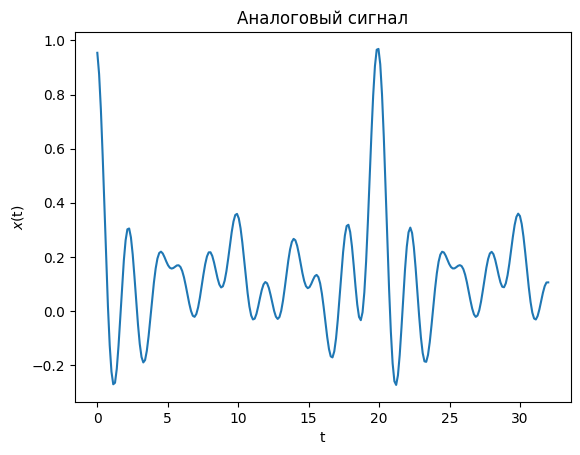

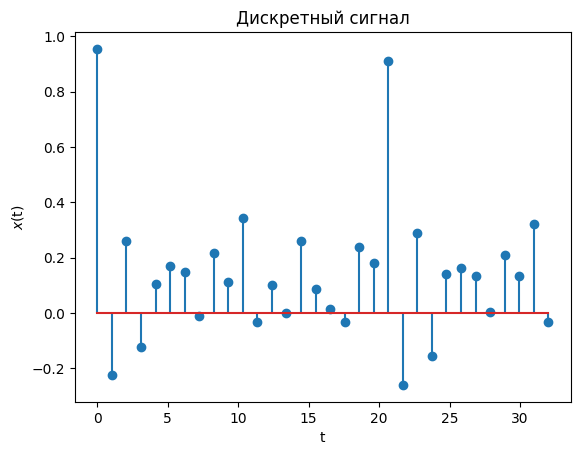

In [3]:
x, y = get_analog(256)
plt.plot(x, y)
plt.ylabel(r'$x$(t)')
plt.xlabel('t')
plt.title('Аналоговый сигнал')
plt.show()

x_disc, y_disc = get_discrete(y)
plt.stem(x_disc, y_disc)
plt.ylabel(r'$x$(t)')
plt.xlabel('t')
plt.title('Дискретный сигнал')
plt.show()

3. С помощью ДПФ найдем дискретные отсчеты спектра дискретного сигнала и визуализируем их. Рассмотрим фрагмент последовательности $\{x_k\}$ из отсчётов $N = 20$. Получим дискретную функцию с периодом $NT$, где $T$ - период дискретизации:

$s(t) = \sum\limits_{k = -\infty}^{+\infty} x_k \delta(t - kT)$

Спектр $s(t)$ также должен быть периодическим (с периодом ${{2\pi} \over T}$) и дискретным расстоянием между гармониками ${{2\pi} \over {NT}}$.

Поскольку $s(t)$ - периодическая функция, то мы можем разложить ее в ряд Фурье с помощью ДПФ. Получим дискретные отсчеты спектра и визуализируем их:

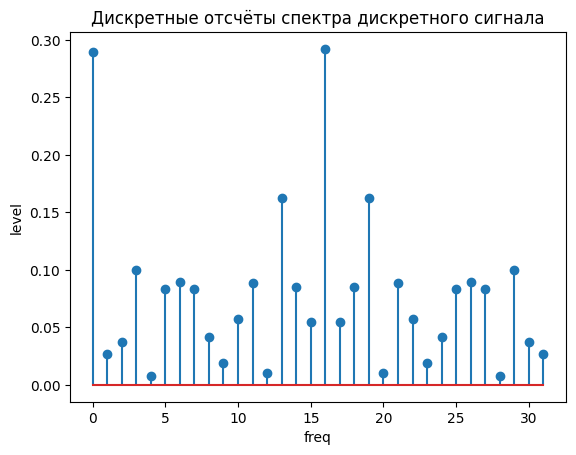

In [4]:
x, y = x_disc, y_disc
plt.stem(2*np.abs(fft(y))/32)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('Дискретные отсчёты спектра дискретного сигнала')
plt.show()

Спектр симметричен относительно нуля, он представляет собой разложение исходного сигнала на линейную комбинацию простых
синусоидальных функций и отражает амплитуды этих функций на разных частотах. Спектр имеет периодичность с шагом 1.

4. Для дискретного сигнала применим линейное сглаживание по 5-ти и 9-ти точкам, представим формулу для $H(\omega)$ - передаточной функции (частотной характеристики) фильтра.

Передаточные функции фильтра для 5 и 9 точек:

$H_5 (\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega})$

$H_9(\omega) = \frac15 (1 + 2\cos\omega + 2\cos{2\omega} + 2\cos{3\omega} + 2\cos{4\omega})$

По данным передаточным функциям выведем формулу для линейного сглаживания по 5 точкам и 9 точкам:

$y_{n,5} = \frac15 \sum\limits_{k=n-2}^{n+2} x_k$

$y_{n,9} = \frac19 \sum\limits_{k=n-4}^{n+4} x_k$

In [5]:
av_y_5 = np.convolve(y, np.ones(5), 'same') / 5
av_y_9 = np.convolve(y, np.ones(9), 'same') / 9

5. Визуализируем полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом:

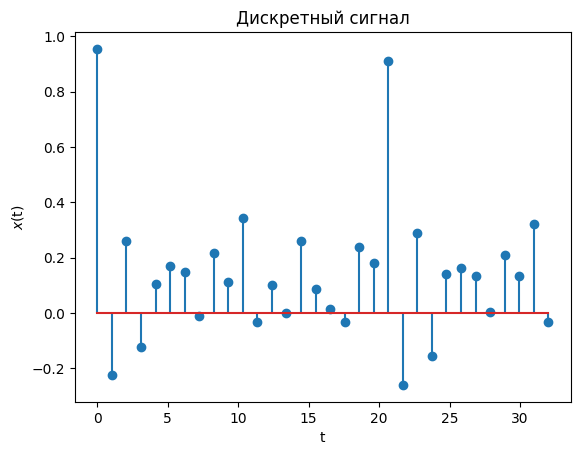

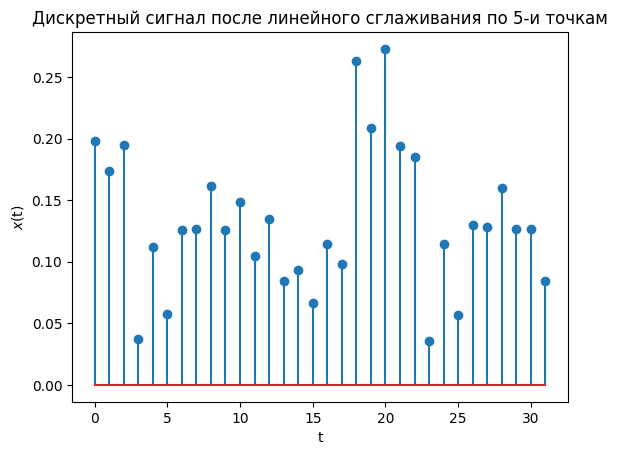

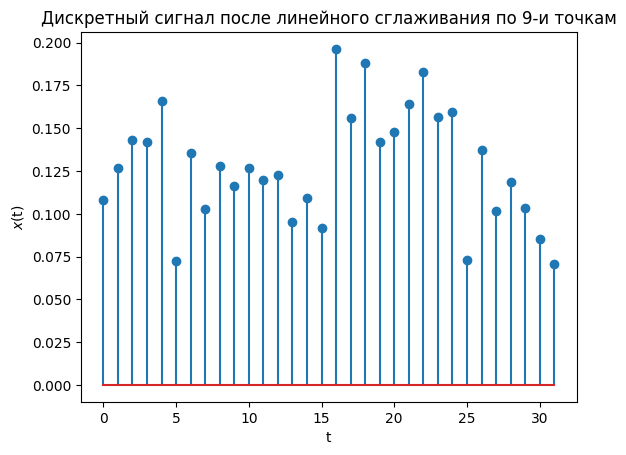

In [6]:
plt.stem(x, y)
plt.ylabel(r'$x$(t)')
plt.xlabel('t')
plt.title('Дискретный сигнал')
plt.show()

plt.stem(av_y_5)
plt.ylabel(r'$x$(t)')
plt.xlabel('t')
plt.title('Дискретный сигнал после линейного сглаживания по 5-и точкам')
plt.show()

plt.stem(av_y_9)
plt.ylabel(r'$x$(t)')
plt.xlabel('t')
plt.title('Дискретный сигнал после линейного сглаживания по 9-и точкам')
plt.show()

6. С помощью ДПФ найдём дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализируем их совместно с отсчетами спектра исходного дискретного сигнала.

Дискретное преобразование Фурье (ДПФ):

$X(n) = \sum\limits_{k=0}^{N-1}y_k e^{-i {{2\pi n} \over N} k}$, $n = 0,1,2,\dots,N-1$

Построим графики:

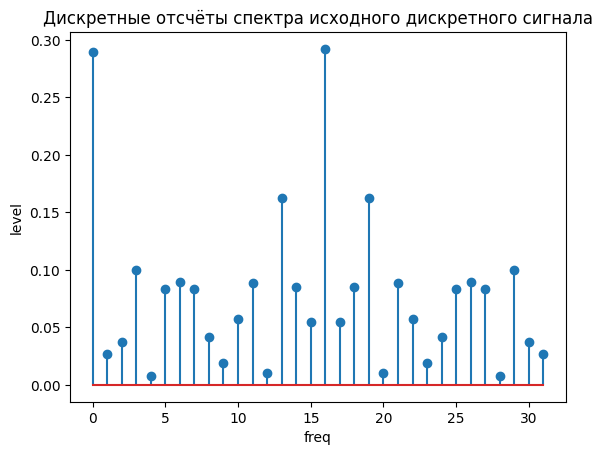

In [7]:
f = fft(y)
f = 2*np.abs(f) / len(f)
f_5 = fft(av_y_5)
f_5 = 2 * np.abs(f_5) / len(f_5)
f_9 = fft(av_y_9)
f_9 = 2 * np.abs(f_9) / len(f_9)
plt.stem(f)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('Дискретные отсчёты спектра исходного дискретного сигнала')
plt.show()

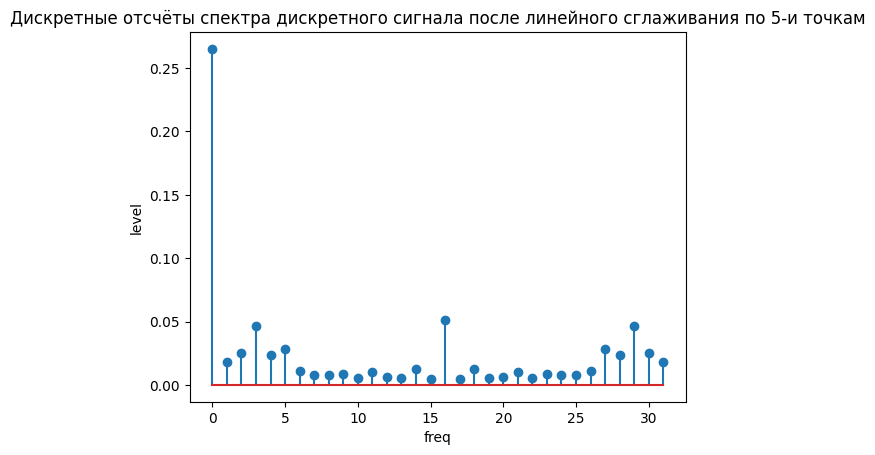

In [8]:
plt.stem(f_5)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('Дискретные отсчёты спектра дискретного сигнала после линейного сглаживания по 5-и точкам')
plt.show()

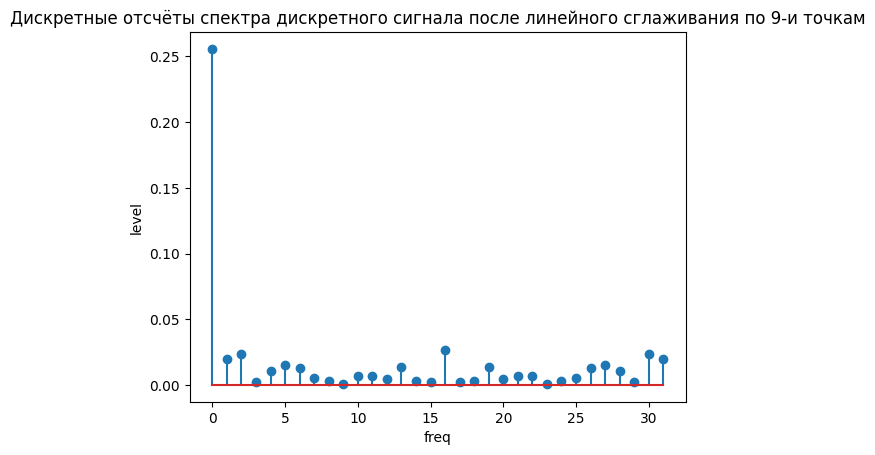

In [9]:
plt.stem(f_9)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('Дискретные отсчёты спектра дискретного сигнала после линейного сглаживания по 9-и точкам')
plt.show()

Из спектра видно, что без ослабления пропускается только сигнал постоянного уровня (нулевой частоты). С увеличением числа точек полоса пропускания становится уже.

7. Проанализируем результат на соответствие значениям $H(\omega)$.

Преобразование Фурье сопоставляет непрерывной во времени бесконечной функции $y_n$ другую, непрерывную по частоте, бесконечную функцию - спектр $X(n)$. Графики подтверждают ранее сделанные выводы относительно полосы пропускания и ослабления уровня.

8. Повторим пп. 4-7 для следующих фильтров:

a. Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.

Передаточная функции (частотной характеристики) фильтра:

$H(\omega) = i\sin\omega$

Формула для численного дифференцирования 1-го порядка.

$y'_n = \frac12(x_{n+1} - x_{n-1})$

График полученного после фильтрации дискретного сигнала совместно с исходным дискретным сигналом:

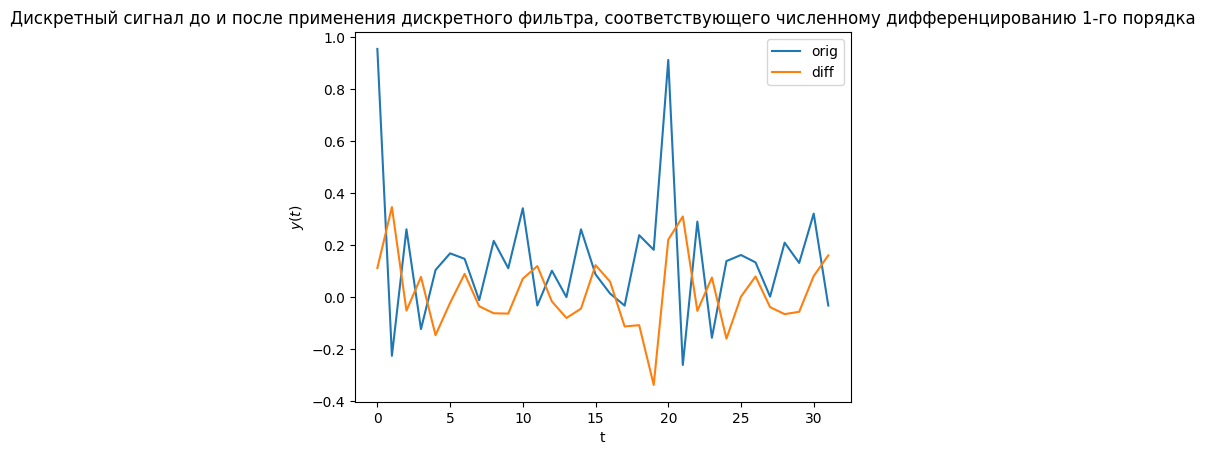

In [13]:
av_y_diff_1 = np.convolve(y, np.array([-1, 0, 1]), 'same') / 2

plt.plot(y, label='orig')
plt.plot(av_y_diff_1, label='diff')
plt.xlabel('t')
plt.ylabel(r'$y(t)$')
plt.legend()
plt.title("Дискретный сигнал до и после применения дискретного фильтра, соответствующего численному дифференцированию 1-го порядка")
plt.show()

C помощью ДПФ были найдены дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализированы совместно с отчетами спектра исходного дискретного сигнала.

Дискретное преобразование Фурье (ДПФ):

$X(n) = \sum\limits_{k=0}^{N-1}y_k e^{-i {{2\pi n} \over N} k}$, $n = 0,1,2,\dots,N-1$

Построим графики:

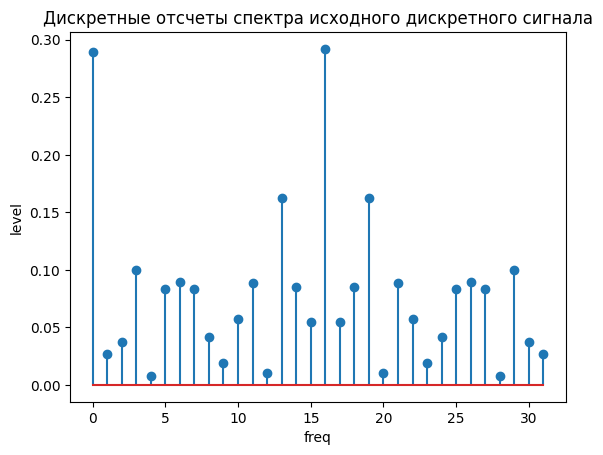

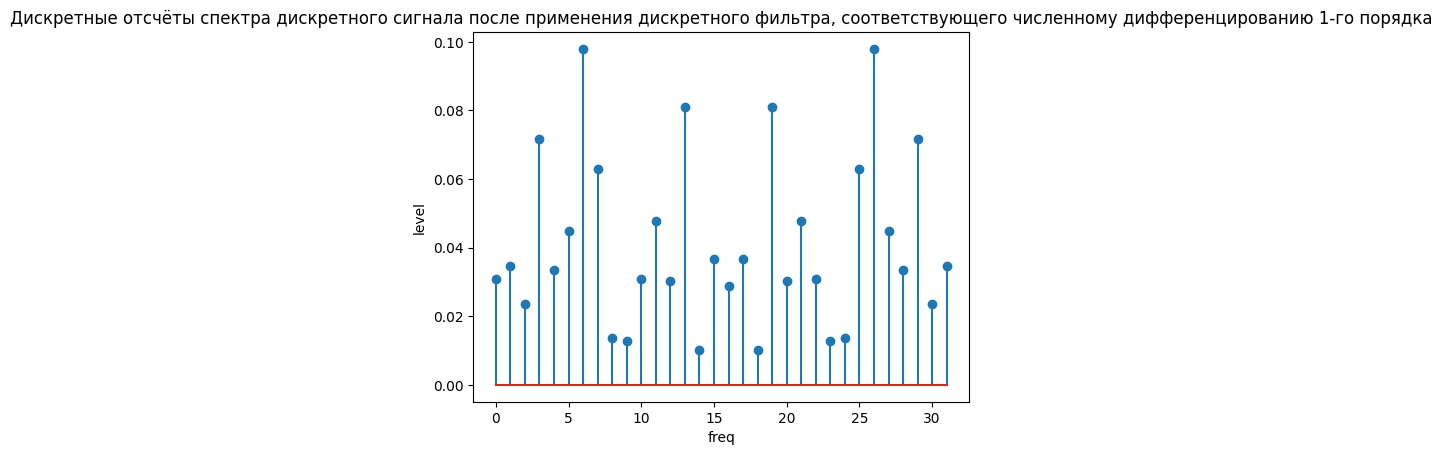

In [14]:
f = fft(y)
f = 2*np.abs(f) / len(f)
f_5 = fft(av_y_diff_1)
f_5 = 2 * np.abs(f_5) / len(f_5)
plt.stem(f)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('DFP orig')
plt.title("Дискретные отсчеты спектра исходного дискретного сигнала")
plt.show()

plt.stem(f_5)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('DFP diff')
plt.title("Дискретные отсчёты спектра дискретного сигнала после применения дискретного фильтра, соответствующего численному дифференцированию 1-го порядка")
plt.show()

По графику спектра видно, что средние частоты действительно усиливаются, при этом низкие и высокие частоты сглаживаются

b. Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

Для дискретного сигнала применим дискретный фильтр, соответствующий численному интегрированию (средних прямоугольников $y_1(n)$, трапеций $y_2(n)$, Симпсона $y_3(n))$:

$y_1(n) = y_1(n-1) + x_{2n-1}$

$y_2(n) = y_2(n-1) + \frac12(x_n + x_{n+1})$

$y_3(n+1) = y_3(n-1) + \frac13 (x_{n-1} + 4x_n + x_{n+1})$

Представим формулу для передаточной функции (частотной характеристики) фильтра:

$H_1(\omega) = {1 \over {2i\sin\frac\omega2}}$

$H_2(\omega) = {{\cos\frac\omega2} \over {2i\sin\frac\omega2}}$

$H_3(\omega) = {(\cos\omega + 2) \over {3i\sin\omega}}$

Построим графики:

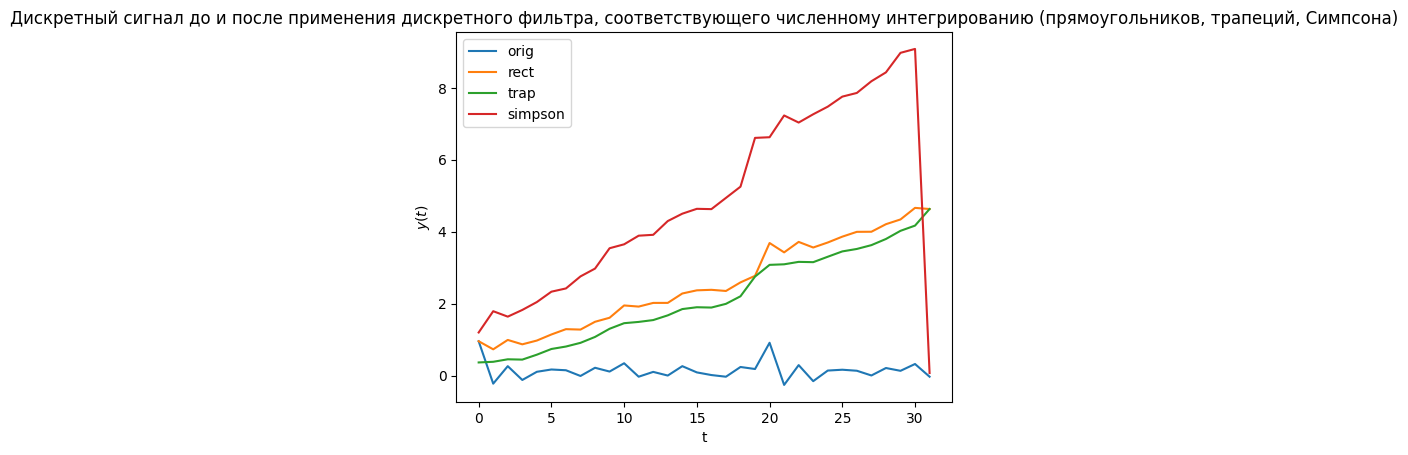

In [17]:
def rect(orig):
    integr = np.empty(len(orig))
    integr[0] = orig[0]
    for i in range(1, len(orig)):
        integr[i] = integr[i-1] + orig[i]
    return integr

def simpson(orig):
    integr = np.empty(len(orig))
    integr[0] = (0 + 4 * orig[0] + orig[1]) / 3
    for i in range(1, len(orig) - 1):
        integr[i] = integr[i - 1] + (orig[i - 1] + orig[i] + 4 * orig[i + 1]) / 3
    return integr

def trap(orig):
    integr = np.empty(len(orig))
    integr[0] = (orig[0] + orig[1]) / 2
    for i in range(1, len(orig)-1):
        integr[i] = integr[i - 1] + (orig[i] + orig[i+1]) / 2
    return integr

y_rect = rect(y)
y_trap = trap(y)
y_simps = simpson(y)
plt.plot(y, label='orig')
plt.plot(y_rect, label='rect')
plt.plot(y_trap, label='trap')
plt.plot(y_simps, label='simpson')
plt.xlabel('t')
plt.ylabel(r'$y(t)$')
plt.legend()
plt.title("Дискретный сигнал до и после применения дискретного фильтра, соответствующего численному интегрированию (прямоугольников, трапеций, Симпсона)")
plt.show()

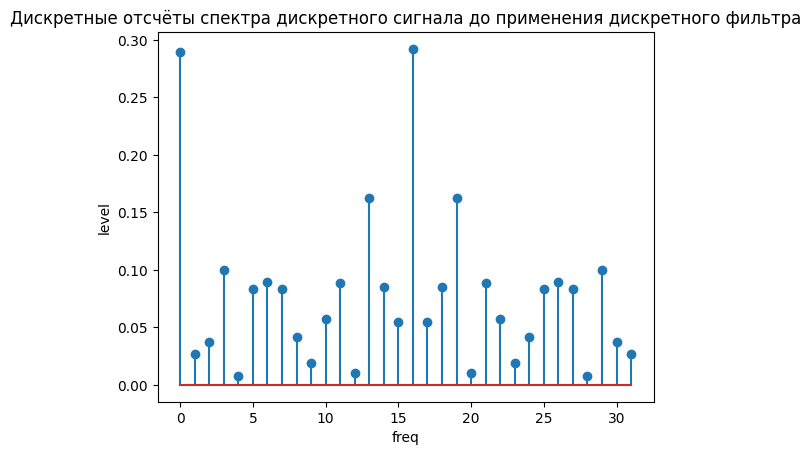

In [23]:
f = fft(y)
f = 2*np.abs(f) / len(f)
f_rect = fft(y_rect)
f_rect = 2 * np.abs(f_rect) / len(f_rect)
f_trap = fft(y_trap)
f_trap = 2 * np.abs(f_trap) / len(f_trap)
f_simps = fft(y_simps)
f_simps = 2 * np.abs(f_simps) / len(f_simps)

plt.stem(f)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('Дискретные отсчёты спектра дискретного сигнала до применения дискретного фильтра')
plt.show()

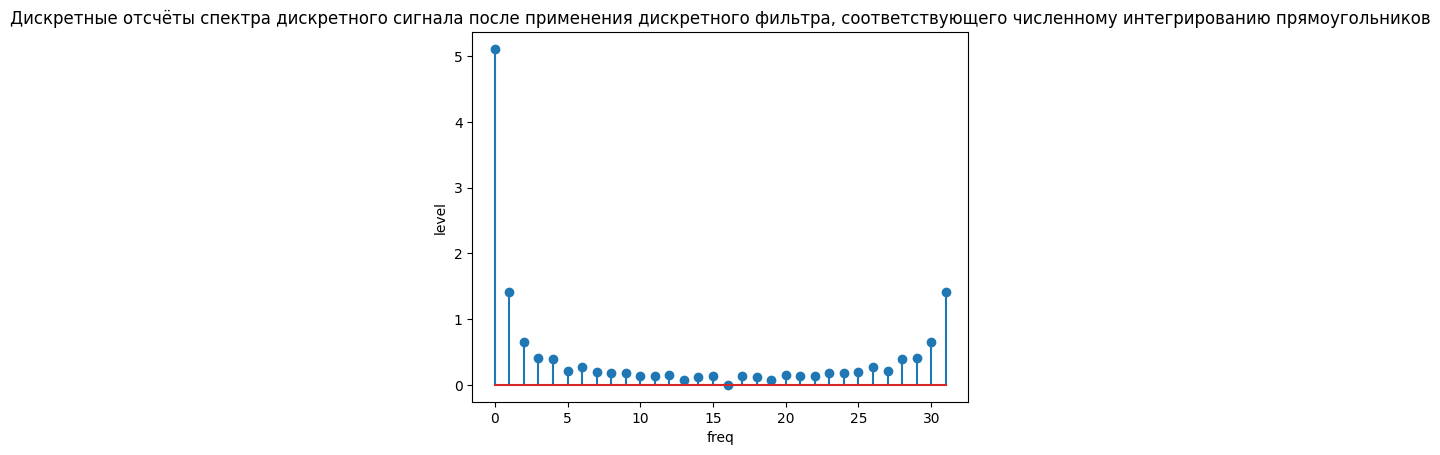

In [24]:
plt.stem(f_rect)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('Дискретные отсчёты спектра дискретного сигнала после применения дискретного фильтра, соответствующего численному интегрированию прямоугольников')
plt.show()

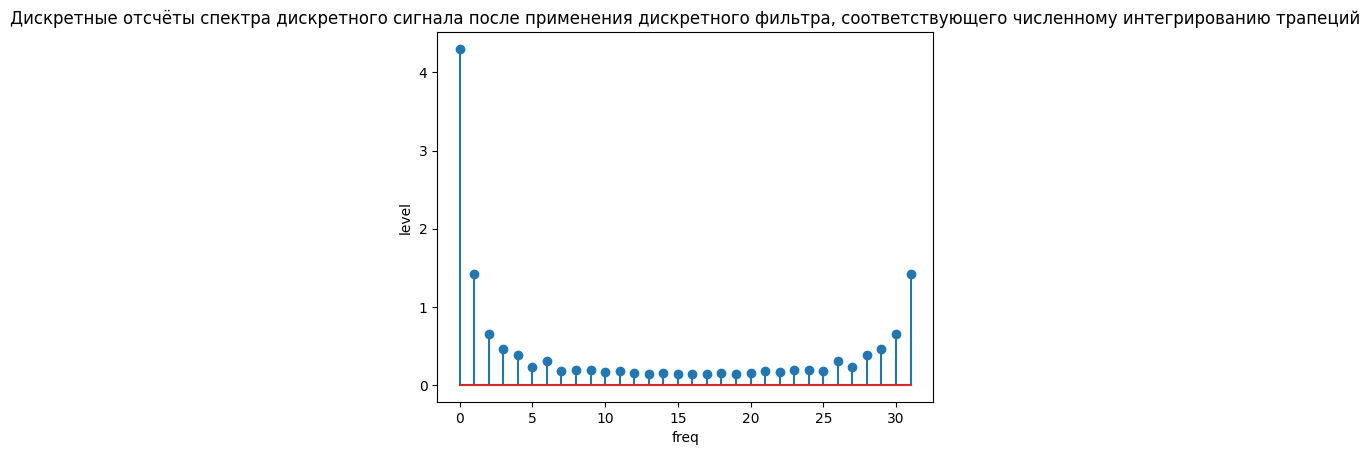

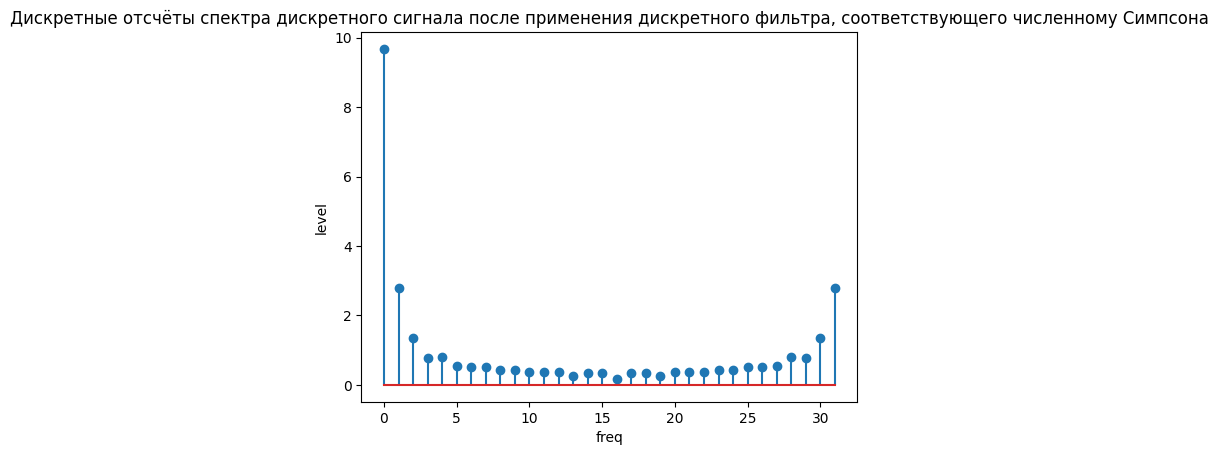

In [25]:
plt.stem(f_trap)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('Дискретные отсчёты спектра дискретного сигнала после применения дискретного фильтра, соответствующего численному интегрированию трапеций')
plt.show()

plt.stem(f_simps)
plt.ylabel(r'level')
plt.xlabel('freq')
plt.title('Дискретные отсчёты спектра дискретного сигнала после применения дискретного фильтра, соответствующего численному Симпсона')
plt.show()

Из спектров можно увидеть отличие сглаживаний интегрированием с помощью различных формул.

1. Сглаживание интегрированием по формулам прямоугольников значительно усиливает низкие частоты в небольшом диапазоне

2.	Сглаживание интегрированием по формулам трапеции усиливает низкие частоты, но в большем диапазоне и с меньшим усилением

3.	Сглаживание интегрированием по формулам Симпсона усиливает весь спектр частот, а в особенности низкие частоты

## Выводы

В результате выполнения лабораторной работы был сгенерирован аналоговый сигнал, дискретизирован, построен спектр дискретного сигнала. Было выяснено, что спектр дискретного сигнала симметричен относительно 0, в спектре (представление в виде дискретных отсчетов) представлено множество частот.  
Был применен дискретный фильтр, соответствующий численному дифференцированию, построен график сигнала, спектр. В результате графики спектра показали, что фильтр имеет полосу пропускания в области средних частот, уменьшает амплитуду низких и высоких частот.
Были применены фильтры, соответствующие численному интегрированию по формулам прямоугольников, трапеций, Симпсона. Фильтры отличаются усилением сигнала в области низких частот, различной полосой пропускания.